In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import math 
%matplotlib inline 


In [ ]:
def f(x):
    return 3*x**2 - 4*x  + 5 

In [ ]:
f(3)


In [ ]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)


# print (xs)


In [ ]:
h =  0.00000000001 
x = -3
(f(x+h) -  f(x)) / h 

In [ ]:
#  lil more complex 
a = 2
b = -3 
c = 10 
d = a*b + c
print (d)


In [ ]:
h = 0.0001

# inputs 
a = 2
b = -3 
c = 10 

d1  = a*b + c
c += h 
d2 = a*b + c

print ('d1', d1 )
print ('d2 ', d2 )
print ("slope", (d1-d2)/h)




In [38]:
class Value: 

    def __init__(self,data, _children=(), _op= "", label = ""):
        self._prev = set (_children)
        self.data = data 
        self._op = _op 

    def __repr__(self):
        return f"Value(data={self.data})"
    

    def __add__(self,other):
        out=Value(self.data + other.data, (self,other), "+")
        return out 
    
    
    def __mul__(self,other):
        out=Value(self.data * other.data, (self,other), "*")
        return out 
     
a = Value(2)
b = Value(-3)
c = Value(10.0)
e = a*b; e.label = "e" 
d = e + c ; d.label = "d"
d    

Value(data=4.0)

In [36]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    

    dot = Digraph (format='svg', graph_attr= {"rankdir" : 'LR'})
  
    # assert rankdir in ['LR', 'TB']

    nodes, edges = trace(root)
    # dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        uid = str(id(n))

        dot.node(name=uid, label = "{ data %.4f }" % (n.data), shape='record')
        if n._op:
            dot.node(name= uid  + n._op, label=n._op)
            dot.edge( uid  + n._op, uid )
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot




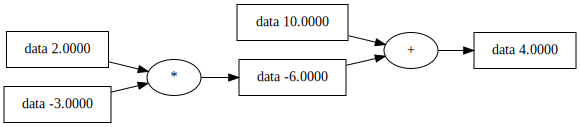

In [35]:
draw_dot(d)